In [1]:
#CREAR UN INDEX PARA ALMACENAR LOS DATOS
from elasticsearch import Elasticsearch
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import datetime
es = Elasticsearch()


def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

if not(es.indices.exists(index="tp5-championstweets")):
    res = es.indices.create(index="tp5-championstweets")  
    pprint(res)

ModuleNotFoundError: No module named 'elasticsearch'

<b>1) ¿Cuántos tweets tienen la palabra "liverpool"? ¿Cómo se distribuye los tweets en el tiempo (ver en un histograma)</b>

In [2]:
res = es.search(index="tp5-championstweets", 
                      body={
                          "query":{
                              "match":{
                                  'text':'liverpool'
                              }
                          },
                          "aggs":{
                              "tweets_over_time":{ 
                                  "date_histogram":{
                                      "field":"timestamp","interval":"1m"
                                  }
                              }
                          }
                      }
                     )
df_liverpool= pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpool=df_liverpool.rename(columns={'key': 'tiempo', 'doc_count': 'numeroTweetsPalabraliverpool'})
df_liverpool['tiempo']=df_liverpool['tiempo'].apply(timestamp2date)
df_liverpool=df_liverpool.drop(df_liverpool[df_liverpool.numeroTweetsPalabraliverpool<290].index)
df_liverpool.plot(kind='bar',figsize=(40,10),x='tiempo')
plt.show()

NameError: name 'es' is not defined

<b>2) ¿De dónde vienen los tweets? (utilizar el campo 'location') </b>

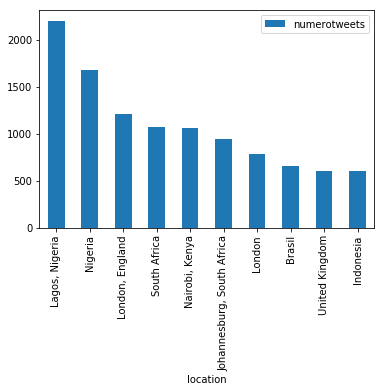

In [16]:
res = es.search(index="tp5-championstweets",
                body={
                    "aggs":{
                        "grb":{
                            "terms":{
                                "field": "location.keyword"
                            }
                        }
                    }
                }
               )
df_location=pd.DataFrame(res['aggregations']['grb']['buckets'])
df_location=df_location.rename(columns={'key': 'location', 'doc_count': 'numerotweets'})
df_location.plot(kind="bar",figsize=(40,10),x="location")
plt.show()


<b>3) ¿Cuántos tweets tienen las palabras "liverpool" y "goal"? (ver en un histograma) </b>

In [3]:
resgoal = es.search(index="tp5-championstweets",
                    body={
                        "query":{
                            "term":{'text':'goal'}},
                        "aggs":{
                            "tweets_over_time":{
                                "date_histogram":{
                                    "field":"timestamp","interval":"1m"
                                }
                            }
                        }
                    }
                   )
resliverpool=es.search(index="tp5-championstweets",
                       body={
                           "query":{
                               "term":{'text':'liverpool'}},
                           "aggs":{
                               "tweets_over_time":{
                                   "date_histogram":{
                                       "field":"timestamp","interval":"1m"
                                   }
                               }
                           }
                       }
                      )
df_goal=pd.DataFrame(resgoal['aggregations']['tweets_over_time']['buckets'])
df_lv=pd.DataFrame(resliverpool['aggregations']['tweets_over_time']['buckets'])
df_goal=df_goal.rename(columns={'key': 'timestamp', 'doc_count': 'numerotweetgoal'})
df_lv=df_lv.rename(columns={'key': 'timestamp', 'doc_count': 'numerotweetliverpool'})
df_goal['timestamp']=df_goal['timestamp'].apply(timestamp2date)
df_lv['timestamp']=df_lv['timestamp'].apply(timestamp2date)
df_goalv=pd.merge(df_goal,df_lv,on='timestamp')
df_goalv.plot(kind='bar',figsize=(40,10),x='timestamp')
plt.show()

NameError: name 'es' is not defined

<b>4) Graficar un Pie Chart comparando el número de tweets con: a) la palabra 'liverpool', b) la palabra 'madrid', c) la palabra 'madrid' y 'liverpool' d) ninguna de las palabras </b>

In [2]:
resmad = es.search(index="tp5-championstweets",
                   body={
                       "query":{
                           "term":{'text':'madrid'}},
                       "aggs":{
                           "tweets_over_time":{
                               "date_histogram":{
                                   "field":"timestamp","interval":"1m"
                               }
                           }
                       }
                   }
                  )
resmal = es.search(index="tp5-championstweets",
                   body={
                       "query":{
                           "match":{'text':'(madrid)+( )* (liverpool)+'}},
                       "aggs":{
                           "tweets_over_time":{
                               "date_histogram":{
                                   "field":"timestamp","interval":"1m"
                               }
                           }
                       }
                   }
                  )
madrid=pd.DataFrame(resmad['aggregations']['tweets_over_time']['buckets'])
mal=pd.DataFrame(resmal['aggregations']['tweets_over_time']['buckets'])
madrid=madrid.rename(columns={'key': 'timestamp', 'doc_count': 'numerotweetmadrid'})
mal=mal.rename(columns={'key': 'timestamp', 'doc_count': 'numerotweetmadrid + liverpool'})
madrid['timestamp']=madrid['timestamp'].apply(timestamp2date)
mal['timestamp']=mal['timestamp'].apply(timestamp2date)
dff=pd.merge(mal,madrid,on='timestamp')
dff=pd.merge(dff,lv,on='timestamp')
dff[['numerotweetmadrid + liverpool','numerotweetmadrid','numerotweetliverpool']].sum().plot(kind='pie')
plt.show()

NameError: name 'es' is not defined

<b>5) ¿Cuáles son los emoticons más frecuentes? A partir de las visualizaciones disponibles en las librerias MatplotLib y/o Seaborn (seaborn.pydata.org), proponer una visualización para observar las emociones expresadas durante el partido </b>

In [1]:
feliz = es.search(index="tp5-championstweets",
                  body={
                      "query":{
                          "match":{'text':'feliz'}}
                  }
                 )
triste= es.search(index="tp5-championstweets",
                  body={
                      "query":{
                          "match":{'text':'triste'}
                      }
                  }
                 )
enojado=es.search(index="tp5-championstweets",
                  body={
                      "query":{
                          "match":{'text':'enojado'}
                      }
                  }
                 )
sorprendido=es.search(index="tp5-championstweets",
                      body={
                          "query":{
                              "match":{'text':'sorprendido'}
                          }
                      }
                     )
emociones={'totalfeliz':[feliz['hits']['total']],'totaltriste':[triste['hits']['total']],'totalenojado':[enojado['hits']['total']]
          ,'totalsorprendido':[sorprendido['hits']['total']]}
emociondata=pd.DataFrame(data=emociones)
emociondata.sum().plot(kind='pie')
plt.show()

NameError: name 'es' is not defined